# Import Libraries

In [1]:
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Processing


## Read Dataframe

In [2]:


pd.set_option('display.max_colwidth', 100)

assessments = pd.read_csv('data\ml_data_spacy.csv', encoding='utf8')
assessments.columns = ["status", "text"]
assessments.head()

,status,text
0,low_risk,allergic rhinitis
1,high_risk,patient 56 year old female present bariatric surgery service body mass index 41 obesity relate c...
2,low_risk,patient status post lap band adjustment total 7 ml band tolerate water postprocedure come week a...
3,low_risk,abdominal cramp past 2 day 1 2 10 intensity performance status karnofsky score 100 continue work...
4,low_risk,uti.2 gerd.3 dysphagia.4 contraception consult


## Data Review

434
Unique values in column: ['low_risk' 'high_risk']
Value counts:
 high_risk    257
low_risk     177
Name: status, dtype: int64


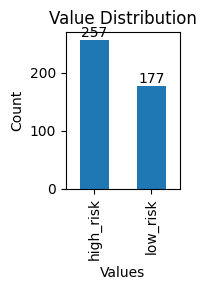

In [3]:
status_data = assessments['status']

unique_values = status_data.unique()
value_counts = status_data.value_counts()

plt.figure(figsize=(2, 3))  # Set the figure size to your desired dimensions

print(status_data.size)
print("Unique values in column:", unique_values)
print("Value counts:\n", value_counts)

bar_plot = status_data.value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Distribution')

# Add value labels to the bars
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()  # Ensures all elements fit within the figure
plt.show()


## Balance Dataset

To train a ml-model the dataset is balanced to avoid bias 

In [4]:
df=assessments

# Count the occurrences of each value in the 'status' column
status_counts = df['status'].value_counts()

# Find the minimum count between 'low_risk' and 'high_risk' statuses
min_count = min(status_counts['low_risk'], status_counts['high_risk'])

# Separate the rows for each status
low_risk_rows = df[df['status'] == 'low_risk'].sample(n=min_count, random_state=42)
high_risk_rows = df[df['status'] == 'high_risk'].sample(n=min_count, random_state=42)

# Concatenate the balanced rows
balanced_df = pd.concat([low_risk_rows, high_risk_rows])

# Shuffle the rows in the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)




In [5]:
balanced_status_data = balanced_df['status']

unique_values = balanced_status_data.unique()
value_counts = balanced_status_data.value_counts()
print("Number of medical statements: ", balanced_status_data.size)
print("-"*70)
print("Unique status labels:", unique_values)
print("-"*70)
print("Value counts:\n", value_counts)
print("-"*70)
balanced_df.head()


Number of medical statements:  354
----------------------------------------------------------------------
Unique status labels: ['high_risk' 'low_risk']
----------------------------------------------------------------------
Value counts:
 high_risk    177
low_risk     177
Name: status, dtype: int64
----------------------------------------------------------------------


,status,text
0,high_risk,age relate macular degeneration category right great sign left).2 glaucoma suspect base disc app...
1,low_risk,history hyperlipidemia elevate triglyceride maintain gemfibrozil 600 b.i.d health maintenance is...
2,high_risk,acute renal failure probability secondary acute tubular necrosis sepsis significant hypotension ...
3,high_risk,sexual dysfunction
4,low_risk,patient disease life threaten currently cause moderately severe effect problem diagnosis 1 neuro...


## Data Tokenising & Cleaning

1) Tokenise data using built in cleaner of gensim (the loaded dataset has already been processed)

2) map labels: low_risk = 0 / high_risk = 1

In [6]:
# Clean data using the built in cleaner in gensim
balanced_df['text_clean'] = balanced_df['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Encoding the label column
balanced_df['status']=balanced_df['status'].map({'low_risk':0,'high_risk':1})


balanced_df.head()


,status,text,text_clean
0,1,age relate macular degeneration category right great sign left).2 glaucoma suspect base disc app...,"[age, relate, macular, degeneration, category, right, great, sign, left, glaucoma, suspect, base..."
1,0,history hyperlipidemia elevate triglyceride maintain gemfibrozil 600 b.i.d health maintenance is...,"[history, hyperlipidemia, elevate, triglyceride, maintain, gemfibrozil, health, maintenance, iss..."
2,1,acute renal failure probability secondary acute tubular necrosis sepsis significant hypotension ...,"[acute, renal, failure, probability, secondary, acute, tubular, necrosis, sepsis, significant, h..."
3,1,sexual dysfunction,"[sexual, dysfunction]"
4,0,patient disease life threaten currently cause moderately severe effect problem diagnosis 1 neuro...,"[patient, disease, life, threaten, currently, cause, moderately, severe, effect, problem, diagno..."


## Split Dataset

The dataframe (dataset) is splitted:

- X_train = assessment statement for training
- X_test = according label for training belonging to assessment 
- y_train = assessment statement for test
- y_test = according label for testing belonging to assessment 

In [7]:
# Split data into train and test sets
# Set a fixed random seed
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split (balanced_df['text_clean'], balanced_df['status'] , test_size=0.2)

In [8]:
print(len(y_train))

283


Create a variable storing all sentences (to train word2vec model with the highest )

In [9]:
print(type(X_train))
X_total = pd.concat([X_train, X_test])
len(X_total)
(X_total)

<class 'pandas.core.series.Series'>


352    [examination, good, quality, good, bolus, timing, good, demonstration, coronary, artery, leave, ...
203    [year, old, female, history, febrile, seizure, concern, spell, unclear, etiology, somewhat, conc...
343    [recent, cerebrovascular, accident, right, side, weakness, hypertension, dementia, anxiety, urin...
182    [arthralgia, suspicious, inflammatory, arthritis, certainly, active, bothersome, think, need, lo...
75     [patient, basal, energy, expenditure, adjust, obesity, estimate, calorie, day, total, calorie, r...
                                                      ...                                                 
342    [history, hyperlipidemia, elevate, triglyceride, maintain, gemfibrozil, health, maintenance, iss...
195    [upper, respiratory, infection, treatment, use, bulb, syringe, saline, nose, drop, mucus, anteri...
242    [base, result, weston, aphasia, battery, patient, deficit, closely, resemble, global, aphasia, s...
93     [year, old, female, clostridiu

In [10]:
#Save X_total as dataframe

df = pd.DataFrame({'X_total': X_total})

df.head()

,X_total
352,"[examination, good, quality, good, bolus, timing, good, demonstration, coronary, artery, leave, ..."
203,"[year, old, female, history, febrile, seizure, concern, spell, unclear, etiology, somewhat, conc..."
343,"[recent, cerebrovascular, accident, right, side, weakness, hypertension, dementia, anxiety, urin..."
182,"[arthralgia, suspicious, inflammatory, arthritis, certainly, active, bothersome, think, need, lo..."
75,"[patient, basal, energy, expenditure, adjust, obesity, estimate, calorie, day, total, calorie, r..."


In [11]:
list_X_train = X_train.tolist()
list_X_test = X_test.tolist()
list_y_train = y_train.tolist()
list_y_test = y_test.tolist()

# print(list_X_train[0], list_X_test[0])
# print(list_y_train[0], list_y_test[0])



# word2vec training

## Initiation:

- builds the vocabulary
- starts training the Word2Vec model
- training a neural network with a single hidden layer where we train the model to predict the current word based on the context (using the default neural architecture)
- the goal is to learn the weights (word vectors) of the hidden layer. 
- The resulting learned vector is also known as the embeddings. 
- embeddings = features describing the target word (For example, the word `king` may be described by the gender, age, the type of people the king associates with, etc)

In [12]:
# Init word2vec
vector_size_n_w2v = 300
w2v_model = gensim.models.Word2Vec(X_total,
                                   vector_size=vector_size_n_w2v,   #Representing the dimensions of each vector belonging to a word 
                                   window=10,                       #The maximum distance between the current word and its neighboring words
                                   min_count=1,                     #Determines the number of times a word must occur in the text corpus for a word vector to be created
                                   sg = 1,                          #0=CBOW/1=Skip-Gram
                                   sample = 1e-5,
                                   negative=5)

## Save word2vec and reload

- the word2vec model is saved as pickle file
- additionally, the vector size is saved as it must be used later 

In [13]:
# import pickle


# # Save the model as a pickle file
# with open('pickles/w2vec_model_X_total_spacy.pkl', 'wb') as f:
#     pickle.dump(w2v_model, f)

# pickle.dump(vector_size_n_w2v, open('pickles/vector_size_w2v_metric_X_total_spacy.pkl', 'wb'))

In [14]:
import pickle

# Load the Word2Vec model from the pickle file
with open('pickles/w2vec_model_X_total_spacy.pkl', 'rb') as f:
    X_total_loaded_w2vec_model = pickle.load(f)

X_total_vector_size_n_reloaded = pickle.load(open("pickles/vector_size_w2v_metric_X_total_spacy.pkl",'rb'))

## Review the vocabulary and its vector

In [15]:
#all of the words that the word2vec model has learned a vector for
#all of the words that appeared in the training data at least twice (see min_count)
#print((loaded_w2vec_model.wv.index_to_key))
print(len(X_total_loaded_w2vec_model.wv.index_to_key))

2084


In [16]:
corpus = ((X_total_loaded_w2vec_model.wv.index_to_key))
vectorizer = CountVectorizer(stop_words='english') 
X = vectorizer.fit_transform(corpus) 
bow = pd.DataFrame(X.A, columns=vectorizer.get_feature_names_out())
bow

,abc,abcd,abdoman,abdominal,abduction,ability,able,abnormal,abnormality,abscess,...,xs,xyz,year,yeast,yes,yesterday,young,zinc,zs,zyprexa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
bow.to_csv('data/bow.csv', index=False)  # Save DataFrame to CSV file
#df = pd.read_csv('filename.csv')  # Read CSV file into DataFrame

In [18]:
#Output of the calculated vector for a given word from the vocabulary
X_total_loaded_w2vec_model.wv["weight"]

array([ 1.83474889e-03,  2.28774361e-03,  2.08374648e-03, -3.09358910e-03,
        3.19550117e-03, -2.74993689e-03,  2.54694984e-04,  7.25002974e-05,
        2.40754592e-03, -2.89558782e-03,  1.01652718e-03, -2.06359592e-03,
        1.65739516e-06,  2.47204956e-03, -3.10672051e-03,  3.27065657e-03,
       -3.04753636e-03,  2.24688696e-03, -2.73572304e-03, -2.23116949e-03,
       -2.75747967e-03,  1.98456156e-03, -8.26276024e-04,  5.87644230e-04,
       -2.92688189e-03,  3.34107503e-03,  9.67260217e-04, -1.43547426e-03,
       -1.10136461e-03,  2.65712105e-03,  1.00032846e-03, -3.25310230e-03,
        1.10151398e-03, -1.87419937e-03,  7.38832809e-04,  2.66487501e-03,
       -4.29478416e-04,  3.84559571e-05,  2.01665447e-03, -1.96496467e-03,
        1.15564454e-03,  1.35298190e-03, -3.17526632e-03, -1.25331769e-03,
        2.66757817e-03,  5.98073297e-04,  3.13895498e-03, -5.29342506e-04,
        2.77526164e-03, -2.75296788e-03,  1.77697756e-03, -2.92857224e-03,
        8.74481571e-04,  

## Process vectors to use them for machine learning model

## Generation of aggregated Sentence Vectors:



- A set is an unordered collection of unique elements, meaning that duplicate values are eliminated. 
- By converting the list to a set, it ensures that each word appears only once in the resulting set

- create array which contains the vectors for each word of one particular sentence (len xtrain + len xtest == amount of sentences)

In [19]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
# Replace the words in each assessment status with the learned word vector

words = set(X_total_loaded_w2vec_model.wv.index_to_key) #returns list of the words the model learned a vector 

X_train_vect = np.array([np.array([X_total_loaded_w2vec_model.wv[i] for i in ls if i in words])
                         for ls in X_train])

X_test_vect = np.array([np.array([X_total_loaded_w2vec_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

C:\Users\Tim\AppData\Local\Temp\ipykernel_8176\1000810332.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([X_total_loaded_w2vec_model.wv[i] for i in ls if i in words])
C:\Users\Tim\AppData\Local\Temp\ipykernel_8176\1000810332.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([X_total_loaded_w2vec_model.wv[i] for i in ls if i in words])


In [20]:
print((X_test_vect[0]))

[[ 0.000272    0.00084093  0.00097322 ...  0.00101258  0.00382206
  -0.00170458]
 [-0.00262309  0.00317793  0.00028562 ... -0.00279715  0.0014366
  -0.00209923]
 [ 0.00346071  0.00083511  0.00193156 ...  0.00137885  0.00299759
  -0.00071797]
 ...
 [ 0.00171811 -0.00092692 -0.00194898 ...  0.00315146 -0.00025651
   0.00163905]
 [ 0.000272    0.00084093  0.00097322 ...  0.00101258  0.00382206
  -0.00170458]
 [-0.00122782  0.00032523  0.00143541 ... -0.00146627 -0.00136634
  -0.00010159]]


In [21]:
print(len(X_train_vect))
print(len(words))

283
2084


In [22]:
index_to_print = 1  # Specify the index of the item to print
v = X_train_vect[index_to_print]

sentence = X_train.iloc[index_to_print]
print("Sentence:", sentence)
print("Length of sentence:", len(sentence))
print("Length of sentence vector:", len(v))
print("Sentence vector:\n", v)
print("_" * 260)


Sentence: ['year', 'old', 'female', 'history', 'febrile', 'seizure', 'concern', 'spell', 'unclear', 'etiology', 'somewhat', 'concern', 'partial', 'complex', 'seizure', 'slightly', 'less', 'extent', 'nonconvulsive', 'generalize', 'seizure', 'recommendations', 'ahead', 'try', 'capture', 'eeg', 'long', 'tolerate', 'require', 'sedation', 'defer', 'eeg', 'adjustment', 'seizure', 'medication', 'response', 'medications', 'increase', 'keppra', 'mg', 'bring', 'total', 'daily', 'dose', 'mg', 'kg', 'day', 'spell', 'note', 'increase', 'upwards', 'ml', 'day', 'feel', 'like', 'specific', 'image', 'need', 'time', 'response', 'medication', 'review', 'eeg', 'finding', 'eeg', 'hopefully', 'able', 'review', 'thing', 'tomorrow', 'morning', 'delay', 'discharge', 'patient', 'wait', 'eeg', 'result', 'patient', 'discharge', 'contact', 'family', 'outpatient', 'patient', 'need', 'followup', 'arrangement', 'week', 'time', 'recheck', 'arrange', 'followup']
Length of sentence: 91
Length of sentence vector: 91
Sent

In [23]:
# Why is the length of the sentence different than the length of the sentence vector? heterogenous database
# --> sentences have different numbers of words
for i, v in enumerate(X_train_vect):
    if i == 5:
        break
    print(len(X_train.iloc[i]), len(v))

371 371
91 91
18 18
21 21
127 127


## Calculate vector average

- for ml_model a consistent set of features for each example is needed
- To get the number of features equal, the next step is to calculate an element-wise average of the different vectors assigned to a sentence. 
- Average the word vectors for each sentence (and assign a vector of zeros if the model did not learn any of the words in the text message during training)

[array(
        
        [[0.1, 0.2, 0.3, 0.4],

        [[0.1, 0.2, 0.3, 0.4]]
        
        ])]

element1 = [0.1, 0.1] --> calculate average

In [24]:
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(X_total_vector_size_n_reloaded, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(X_total_vector_size_n_reloaded, dtype=float))

In [25]:
index_to_print = 0  # Specify the index of the item to print
v = X_train_vect_avg[index_to_print]

sentence = X_train.iloc[index_to_print]
print("Sentence:", sentence)
print("Length of sentence:", len(sentence))
print("Length of sentence vector:", len(v))
print("Sentence vector:\n", v)
print("_" * 260)

Sentence: ['examination', 'good', 'quality', 'good', 'bolus', 'timing', 'good', 'demonstration', 'coronary', 'artery', 'leave', 'main', 'coronary', 'artery', 'leave', 'main', 'coronary', 'artery', 'posteriorly', 'position', 'valve', 'cusp', 'patent', 'ostium', 'extramural', 'non', 'malignant', 'course', 'vessel', 'moderate', 'size', 'apparent', 'second', 'ostium', 'normal', 'anatomic', 'location', 'small', 'extramural', 'non', 'malignant', 'course', 'mix', 'calcific', 'atheromatous', 'plaque', 'distal', 'vessel', 'positive', 'remodel', 'high', 'grade', 'stenosis', 'flow', 'limit', 'lesion', 'exclude', 'vessel', 'trifurcate', 'leave', 'anterior', 'descend', 'artery', 'ramus', 'intermedius', 'leave', 'circumflex', 'artery', 'leave', 'anterior', 'descend', 'coronary', 'artery', 'leave', 'anterior', 'descend', 'artery', 'moderate', 'size', 'vessel', 'ostial', 'calcific', 'plaque', 'soft', 'plaque', 'high', 'grade', 'stenosis', 'flow', 'limit', 'lesion', 'moderate', 'size', 'bifurcate', 'di

In [26]:
# print(len(X_test_vect_avg))
print(len(X_train_vect_avg[0]))

300


In [27]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(X_train_vect_avg):
    if i == 5:
        break
    print(len(X_train.iloc[i]), len(v))

371 300
91 300
18 300
21 300
127 300


## Print list of vocabulary in alphabetic order

In [28]:
model_keys = X_total_loaded_w2vec_model.wv.key_to_index
vocabulary = (sorted([w for w in model_keys]))
print((vocabulary))

['abc', 'abcd', 'abdoman', 'abdominal', 'abduction', 'ability', 'able', 'abnormal', 'abnormality', 'abscess', 'absence', 'abstinence', 'abuse', 'acanthosis', 'acceptable', 'accessory', 'accident', 'accomplish', 'accord', 'accurately', 'ace', 'achieve', 'acid', 'acidosis', 'acne', 'acquire', 'act', 'active', 'activities', 'activity', 'acute', 'add', 'adderall', 'addiction', 'addition', 'additional', 'address', 'adduction', 'adenoid', 'adenoma', 'adenopathy', 'adequate', 'adhd', 'adjust', 'adjustment', 'adl', 'adls', 'administer', 'admission', 'admit', 'adolescent', 'adrenal', 'adult', 'advil', 'advise', 'aerobic', 'afebrile', 'affect', 'african', 'afternoon', 'age', 'agent', 'agitation', 'ago', 'agree', 'ahead', 'airway', 'alcohol', 'alcoholic', 'alert', 'allergic', 'allergy', 'allow', 'also', 'alternative', 'ama', 'ambulate', 'ambulation', 'ambulator', 'american', 'ana', 'analgesia', 'analog', 'analysis', 'anastomosis', 'anatomic', 'anatomy', 'anca', 'anemia', 'angina', 'angio', 'ankle

In [29]:
X_total_loaded_w2vec_model.wv["weight"]

array([ 1.83474889e-03,  2.28774361e-03,  2.08374648e-03, -3.09358910e-03,
        3.19550117e-03, -2.74993689e-03,  2.54694984e-04,  7.25002974e-05,
        2.40754592e-03, -2.89558782e-03,  1.01652718e-03, -2.06359592e-03,
        1.65739516e-06,  2.47204956e-03, -3.10672051e-03,  3.27065657e-03,
       -3.04753636e-03,  2.24688696e-03, -2.73572304e-03, -2.23116949e-03,
       -2.75747967e-03,  1.98456156e-03, -8.26276024e-04,  5.87644230e-04,
       -2.92688189e-03,  3.34107503e-03,  9.67260217e-04, -1.43547426e-03,
       -1.10136461e-03,  2.65712105e-03,  1.00032846e-03, -3.25310230e-03,
        1.10151398e-03, -1.87419937e-03,  7.38832809e-04,  2.66487501e-03,
       -4.29478416e-04,  3.84559571e-05,  2.01665447e-03, -1.96496467e-03,
        1.15564454e-03,  1.35298190e-03, -3.17526632e-03, -1.25331769e-03,
        2.66757817e-03,  5.98073297e-04,  3.13895498e-03, -5.29342506e-04,
        2.77526164e-03, -2.75296788e-03,  1.77697756e-03, -2.92857224e-03,
        8.74481571e-04,  

In [30]:
word = 'bone'  # Change this to the word you want to find similar words for
topn = 5  # Number of similar words to retrieve

similar_words = X_total_loaded_w2vec_model.wv.most_similar(word, topn=topn)
print(similar_words)

[('depression', 0.24266071617603302), ('multiforme', 0.2030278891324997), ('stressor', 0.19599808752536774), ('dissatisfaction', 0.17594361305236816), ('watch', 0.1721128523349762)]


In [31]:
test_one = X_total_loaded_w2vec_model.wv.similarity('bone', 'stroke')
test_two = X_total_loaded_w2vec_model.wv.similarity('brain', 'stroke')

print(test_one)
print(test_two)


0.0075980374
0.013142026


# Apply Machine Learning Model

## RandomForrest

https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6


In [32]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [33]:
# Use the trained model to make predictions on the test data
y_pred=rf_model.predict(X_test_vect_avg)

## Support Vector Machine

In [34]:
from sklearn import svm

svm = svm.SVC(C=1, kernel='rbf')
svm_model = svm.fit(X_train_vect_avg, y_train.values.ravel())


## Evaluation

### Random Forrest - Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(rf_model, X_train_vect_avg, y_train.values.ravel(), cv=5)
print(cv_scores)

[0.8245614  0.87719298 0.85964912 0.85714286 0.875     ]


### SVM Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(svm_model, X_train_vect_avg, y_train.values.ravel(), cv=5)
print(cv_scores)

[0.71929825 0.87719298 0.78947368 0.76785714 0.875     ]


## Classification Report & Confusion Matrix

Model-Evaluation for:  RandomForestClassifier()
Precision: 0.9 / Recall: 0.973 / Accuracy: 0.93 / F1 Score: 0.935 


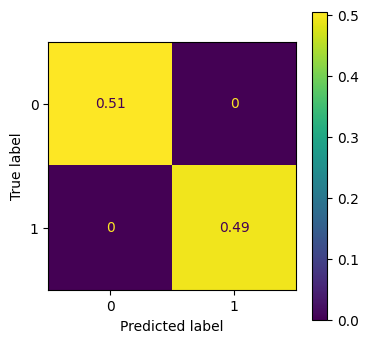

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

model_evaluation = rf_model    #rf_model / svm_model


y_pred=model_evaluation.predict(X_test_vect_avg)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)


print("Model-Evaluation for: ", model_evaluation)
print('Precision: {} / Recall: {} / Accuracy: {} / F1 Score: {} '.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3), round(f1_score, 3)
    ))



fig, ax = plt.subplots(figsize=(4, 4))

display = ConfusionMatrixDisplay.from_estimator(model_evaluation, X_train_vect_avg, y_train.values.ravel(), normalize="all", ax=ax)



## Choose the best model accordingly to f1 score

In [38]:
def model_evaluation(model_type):
    
    y_pred=model_type.predict(X_test_vect_avg)


    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, f1_score

In [39]:
#rf_model / svm_model
rf_precision, rf_recall, rf_f1score = model_evaluation(rf_model)
svm_precision, svm_recall, svm_f1score = model_evaluation(svm_model)

if rf_f1score > svm_f1score:
    best_model = rf_model
else:
    best_model = svm_model

best_precision, best_recall, best_f1score = model_evaluation(best_model)

print("Better model: ", best_model)
print("Report: \n", "f1 score = ", best_f1score)


Better model:  RandomForestClassifier()
Report: 
 f1 score =  0.935064935064935


## Save best performing model

In [40]:
# import pickle
# from sklearn.ensemble import RandomForestClassifier

# titel = ""

# classifier = best_model
# if classifier == svm_model:
#     titel ="pickles/svm_classifier.pkl"
# if classifier == rf_model:
#     titel ="pickles/random_forest_classifier.pkl"

# print(titel)

In [41]:
# with open(titel, 'wb') as file:
#     pickle.dump(classifier, file)

# Tuning Model Hyperparameters - Grid -Search

Tuning Random Forrest: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [42]:
clf_reloaded = pickle.load(open("pickles/random_forest_classifier.pkl",'rb'))

In [43]:
# Get the parameters used in the Random Forest model
params = clf_reloaded.get_params()

# Print the parameters in a structured format
print("Random Forest Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")

Random Forest Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [44]:
clf_reloaded = pickle.load(open("pickles/random_forest_classifier.pkl",'rb'))
rf = clf_reloaded
params = param_grid = {
    "bootstrap": [True],
    "max_depth": [10, 20, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [100, 200]}



In [45]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1,
                           verbose=1)

In [46]:
grid_search.fit(X_train_vect_avg, y_train.values.ravel())

Fitting 5 folds for each of 162 candidates, totalling 810 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_score_

0.8833959899749372

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_params = grid_search.best_params_
rf = RandomForestClassifier(**best_params)
rf.fit(X_train_vect_avg, y_train.values.ravel())



RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       n_estimators=200)

In [ ]:
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test_vect_avg)
report = classification_report(y_test.values.ravel(), y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.94      0.84      0.89        37

    accuracy                           0.89        71
   macro avg       0.89      0.89      0.89        71
weighted avg       0.89      0.89      0.89        71



In [ ]:
test_features = X_test_vect_avg
test_labels = y_test.values.ravel()
train_features = X_train_vect_avg
train_labels = y_train.values.ravel()

Tuning SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm_model
clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1) 
clf.fit(X_train_vect_avg, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(C=1), n_jobs=-1,
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [ ]:
#print(sorted(clf.cv_results_.keys()))
print(clf.best_params_)

{'C': 8, 'kernel': 'rbf'}


In [ ]:
print(clf.score(X_train_vect_avg, y_train.values.ravel()))

1.0


Model-Evaluation for:  GridSearchCV(cv=5, estimator=SVC(C=1), n_jobs=-1,
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})
Precision: 0.889 / Recall: 0.865 / Accuracy: 0.873 / F1 Score: 0.877 


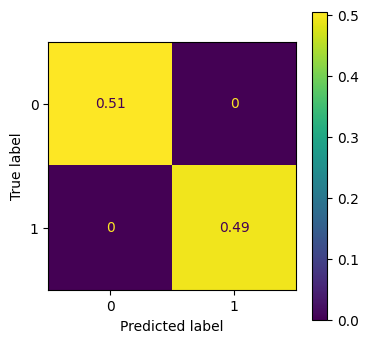

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

model_evaluation = clf     #rf_model / svm_model


y_pred=model_evaluation.predict(X_test_vect_avg)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = 2 * (precision * recall) / (precision + recall)


print("Model-Evaluation for: ", model_evaluation)
print('Precision: {} / Recall: {} / Accuracy: {} / F1 Score: {} '.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3), round(f1_score, 3)
    ))



fig, ax = plt.subplots(figsize=(4, 4))

display = ConfusionMatrixDisplay.from_estimator(model_evaluation, X_train_vect_avg, y_train.values.ravel(), normalize="all", ax=ax)
